# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Dor 2329
# student 2: Chale 0456

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
# Imports

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, KBinsDiscretizer,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression



In [3]:
# load dataset

train = pd.read_csv('housing_train.csv')
test = pd.read_csv('housing_test.csv')

train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46,4.158690,1.032746,512,1.289673,34.07,-118.35,3.500
1,2.7002,6,4.149245,1.179989,4092,2.287311,34.05,-117.31,0.883
2,1.2762,17,3.432331,1.022556,1325,2.490602,34.42,-119.69,2.536
3,4.9342,23,5.735798,1.053201,4580,4.129847,34.04,-117.93,1.810
4,2.2755,21,4.064607,0.962079,2109,2.962079,32.58,-117.11,1.250


In [4]:
test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.3254,32,5.786260,1.033079,982,2.498728,34.29,-119.27,3.852
1,5.3032,52,5.095745,1.028369,980,3.475177,34.08,-118.12,2.457
2,4.1679,41,6.617486,1.371585,915,2.500000,37.05,-122.05,2.013
3,3.6429,28,5.249180,1.009836,848,2.780328,38.69,-121.41,1.052
4,2.7457,17,11.183267,2.107570,675,2.689243,38.88,-119.99,1.078


In [5]:
train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.863517,28.650678,5.412479,1.093546,1424.287609,3.101201,35.631452,-119.566283,2.065267
std,1.878577,12.623994,2.088680,0.378594,1139.012630,11.587773,2.137537,2.006552,1.151219
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564375,18.000000,4.448665,1.005988,789.000000,2.431070,33.930000,-121.800000,1.192000
50%,3.536650,29.000000,5.225511,1.048780,1167.000000,2.816355,34.250000,-118.490000,1.796000
75%,4.744375,37.000000,6.046629,1.099691,1722.000000,3.281612,37.710000,-118.000000,2.647000
max,15.000100,52.000000,62.422222,15.312500,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,3.899288,28.594719,5.495082,1.109192,1430.233285,2.948471,35.633498,-119.583391,2.081721
std,1.982501,12.432039,3.626932,0.741310,1105.994960,1.494160,2.129860,1.991586,1.164887
min,0.499900,2.000000,1.260870,0.526316,9.000000,1.060606,32.550000,-124.300000,0.149990
25%,2.562500,18.000000,4.408809,1.006401,782.000000,2.428303,33.930000,-121.790000,1.213000
50%,3.528300,29.000000,5.242364,1.048403,1159.000000,2.830808,34.270000,-118.540000,1.801000
75%,4.738725,37.000000,6.072817,1.098704,1740.250000,3.283055,37.712500,-118.020000,2.649250
max,15.000100,52.000000,141.909091,34.066667,16305.000000,83.171429,41.820000,-114.470000,5.000010


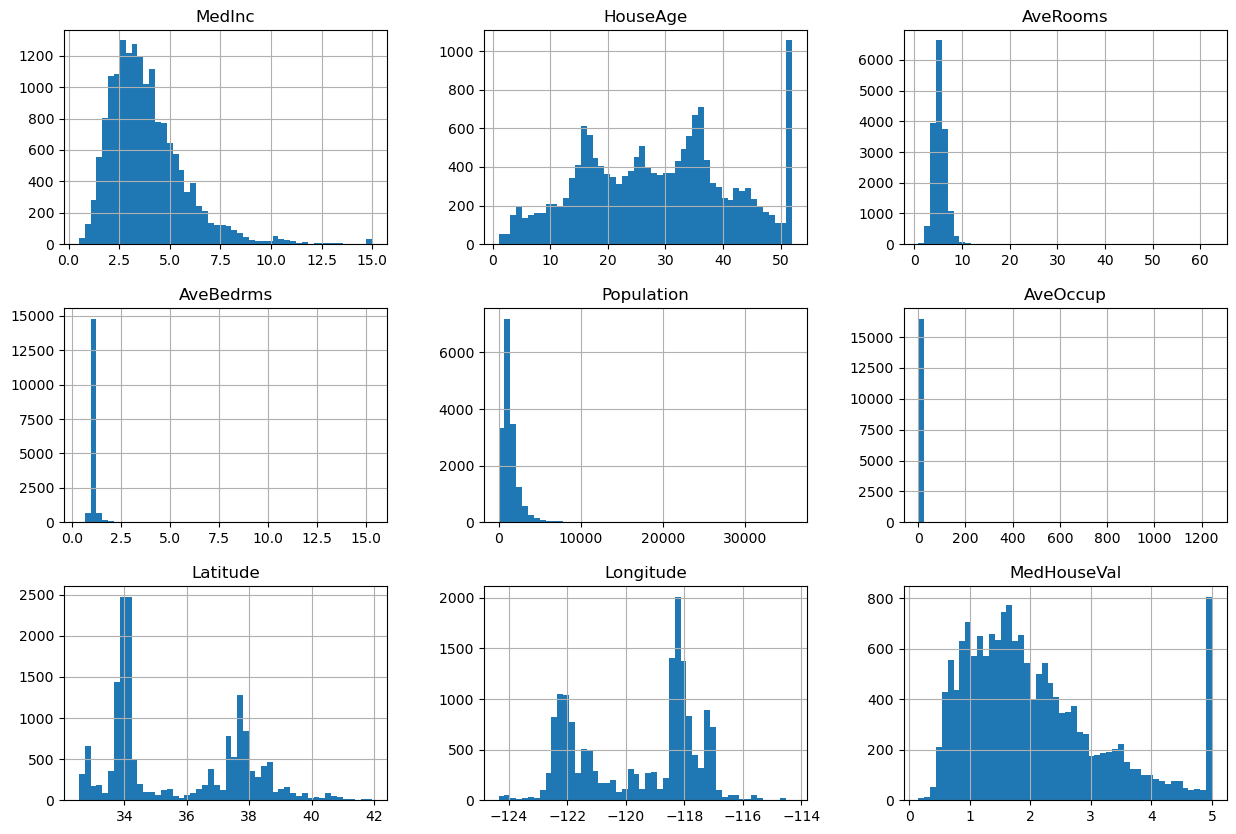

In [7]:
# Histogram for the model

train.hist(bins=50, figsize=(15,10))
plt.show()

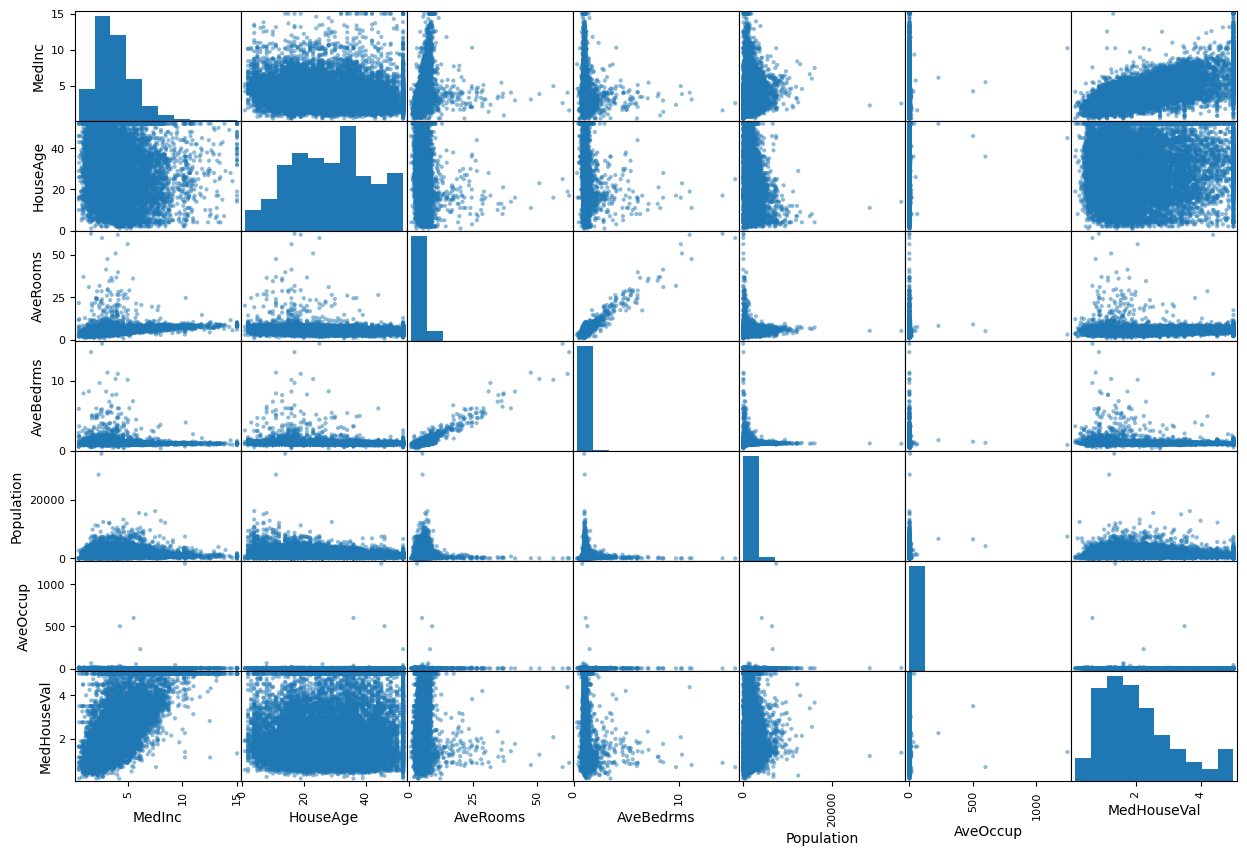

In [8]:
# Scatter matrix for the model
attributes = ['MedInc', 
              'HouseAge', 
              'AveRooms', 
              'AveBedrms', 
              'Population', 
              'AveOccup', 
              'MedHouseVal']
scatter_matrix(train[attributes], figsize = (15, 10))
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [9]:
# Load the 'train' dataset
train_data =  pd.read_csv('housing_train.csv')
X_train = train_data.iloc[:, :-1]  # All columns except the last one as features
y_train = train_data.iloc[:, -1]   # The last column as target

# Load the 'test' dataset
test_data = pd.read_csv('housing_test.csv')
X_test = test_data.iloc[:, :-1]  # All columns except the last one as features
y_test = test_data.iloc[:, -1]   # The last column as target

X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Polynomial feature transformation for the 'Polynomial' feature set
polynomial_transformer = PolynomialFeatures(degree=2)
X_train_polynomial = polynomial_transformer.fit_transform(X_train)
X_test_polynomial = polynomial_transformer.transform(X_test)

# Dictionary for feature sets
features_sets = {
    'Original': (X_train, X_test),  # Original feature set
    'Polynomial': (X_train_polynomial, X_test_polynomial)  # Polynomial feature set
}

# Updated model parameters with a minimal search space
models_params = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {'fit_intercept': [True, False]},
        'features': ['Polynomial']
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [10, 12],
            'min_samples_split': [80, 90],
            'min_samples_leaf': [4, 6]
        },
        'features': ['Original']
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [40, 60],
            'max_depth': [40, 50]
        },
        'features': ['Original']
    }
}

# Function to evaluate models using RandomizedSearchCV with optimizations for speed and accuracy
def evaluate_model(model_name, model_params, feature_set_name, features_sets, y_train_fs, y_test_fs, description):
    print(f"Evaluating {model_name} with {feature_set_name} features ({description})")
    
    X_train_fs, X_test_fs = features_sets[feature_set_name]  # Retrieve the appropriate feature set
    
    # Use RandomizedSearchCV to sample a limited number of combinations
    random_search = RandomizedSearchCV(
        estimator=model_params['model'],
        param_distributions=model_params['params'],
        n_iter=10,  # Fast search with 10 iterations
        cv=2,  # 2-fold cross-validation
        scoring=make_scorer(r2_score),  # R^2 scoring metric for regression
        return_train_score=True,
        random_state=42  # Reproducibility
    )
    random_search.fit(X_train_fs, y_train_fs)
    
    # Collect and return relevant evaluation results
    return {
        'Description': description,
        'Feature Set': feature_set_name,
        'Model': model_name,
        'Parameters': random_search.best_params_,
        'Mean CV Score': random_search.best_score_,
        'Train Score': random_search.score(X_train_fs, y_train_fs),
        'Test R^2 Score': r2_score(y_test_fs, random_search.best_estimator_.predict(X_test_fs))
    }

# Evaluate models across the feature sets and collect the results
all_results = []

# 1. Evaluation using the defined feature sets
for model_name, model_params in models_params.items():
    for feature_set_name in model_params['features']:
        all_results.append(evaluate_model(model_name, model_params, feature_set_name, features_sets, y_train, y_test, 'Original Data'))

# Convert results into a DataFrame for easy analysis
results_df = pd.DataFrame(all_results)
results_df = results_df[['Description', 'Feature Set', 'Model', 'Parameters', 'Mean CV Score', 'Train Score', 'Test R^2 Score']]
results_df.sort_values(by='Mean CV Score', ascending=False, inplace=True)

# Display the sorted results
print(results_df)


Evaluating LinearRegression with Polynomial features (Original Data)
Evaluating DecisionTree with Original features (Original Data)


c:\Users\imdor\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\imdor\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Evaluating RandomForest with Original features (Original Data)


c:\Users\imdor\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


     Description Feature Set             Model  \
2  Original Data    Original      RandomForest   
1  Original Data    Original      DecisionTree   
0  Original Data  Polynomial  LinearRegression   

                                          Parameters  Mean CV Score  \
2              {'n_estimators': 60, 'max_depth': 50}       0.780907   
1  {'min_samples_split': 80, 'min_samples_leaf': ...       0.686927   
0                           {'fit_intercept': False}      -1.416035   

   Train Score  Test R^2 Score  
2     0.971727        0.823200  
1     0.791316        0.734539  
0     0.679785        0.658713  


In [10]:
results_df

,Description,Feature Set,Model,Parameters,Mean CV Score,Train Score,Test R^2 Score
2,Original Data,Original,RandomForest,"{'n_estimators': 60, 'max_depth': 50}",0.780907,0.971727,0.823200
1,Original Data,Original,DecisionTree,"{'min_samples_split': 80, 'min_samples_leaf': ...",0.686927,0.791316,0.734539
0,Original Data,Polynomial,LinearRegression,{'fit_intercept': False},-1.416035,0.679785,0.658713


In [11]:
best_combination = results_df.iloc[0]
best_combination

Description                               Original Data
Feature Set                                    Original
Model                                      RandomForest
Parameters        {'n_estimators': 60, 'max_depth': 50}
Mean CV Score                                  0.780907
Train Score                                    0.971727
Test R^2 Score                                   0.8232
Name: 2, dtype: object

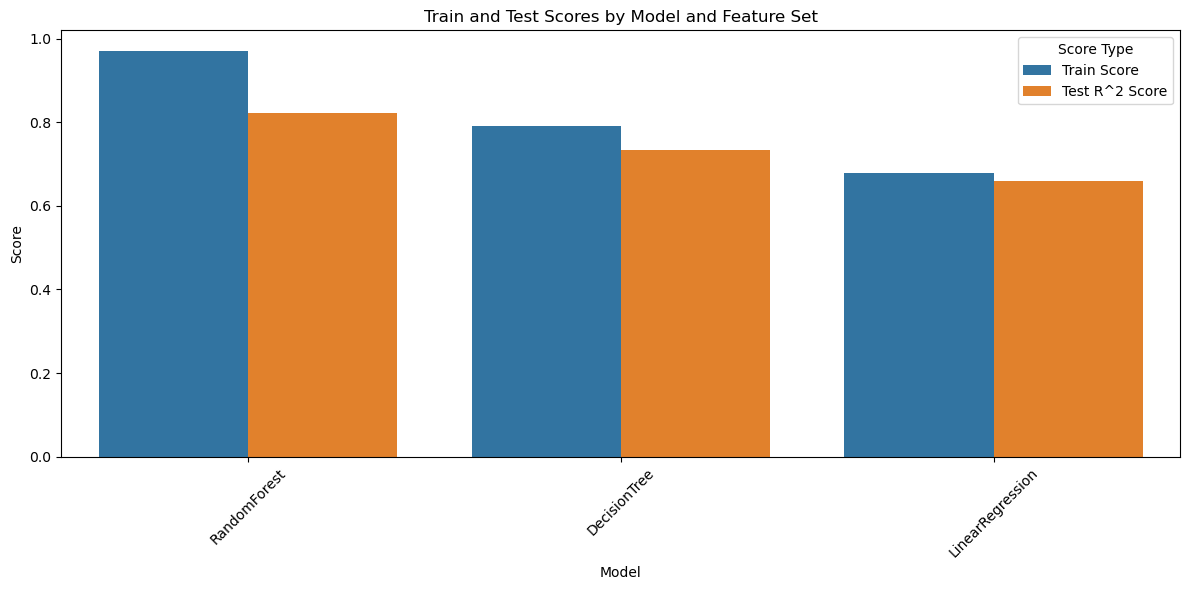

In [12]:
results_df.to_csv('model_evaluation_results.csv', index=False)
# Melt the DataFrame for easier plotting with seaborn
melted_df = pd.melt(results_df, id_vars=['Model', 'Feature Set', 'Description'], 
                    value_vars=['Train Score', 'Test R^2 Score'], 
                    var_name='Score Type', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Model', y='Score', hue='Score Type')
plt.title('Train and Test Scores by Model and Feature Set')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Score Type')
plt.tight_layout()
plt.savefig('train_test_score_comparison.png')
plt.show()

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [13]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the original training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choosing the most successful combination
best_combination = results_df.iloc[0]
print("Best Combination:")
print(best_combination)

# Details of the most successful combination
data_description = best_combination['Description']
best_feature_set = best_combination['Feature Set']
best_model_name = best_combination['Model']
best_params = best_combination['Parameters']

# Initialize the final data
X_train_final = X_train_scaled
X_test_final = X_test_scaled

# Apply data preprocessing based on the description
if 'Data without Outliers' in data_description:
    # Remove outliers
    X_train_final = remove_outliers(pd.DataFrame(X_train_final))
    X_test_final = remove_outliers(pd.DataFrame(X_test_final))
    # Update y values to match the new X_train_final and X_test_final
    y_train_final = y_train.loc[X_train_final.index]
    y_test_final = y_test.loc[X_test_final.index]
else:
    y_train_final = y_train
    y_test_final = y_test

if 'Correlation Between 0.7 and 0.9 Removed' in data_description:
    # Identify and remove highly correlated features
    correlation_threshold1 = 0.7
    correlation_threshold2 = 0.9
    corr_matrix = pd.DataFrame(X_train_final).corr()
    correlated_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if correlation_threshold1 < abs(corr_matrix.iloc[i, j]) < correlation_threshold2:
                correlated_features.add(corr_matrix.columns[i])
    X_train_final = pd.DataFrame(X_train_final).drop(columns=correlated_features)
    X_test_final = pd.DataFrame(X_test_final).drop(columns=correlated_features, errors='ignore')

# Apply polynomial features if needed
if 'Polynomial' in best_feature_set:
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_final = poly.fit_transform(X_train_final)
    X_test_final = poly.transform(X_test_final)

# Create and train the final model
model_classes = {
    'LinearRegression': LinearRegression,
    'DecisionTree': DecisionTreeRegressor,
    'RandomForest': RandomForestRegressor
}

model_class = model_classes.get(best_model_name)
if model_class is None:
    raise ValueError(f"Unknown model: {best_model_name}")

model_final = model_class(**best_params)
model_final.fit(X_train_final, y_train_final)

# Prediction and final R^2 score
y_pred = model_final.predict(X_test_final)
final_r2_score = r2_score(y_test_final, y_pred)
print(f"Final R^2 Score on Test Set: {final_r2_score:.4f}")


Best Combination:
Description                               Original Data
Feature Set                                    Original
Model                                      RandomForest
Parameters        {'n_estimators': 60, 'max_depth': 50}
Mean CV Score                                  0.780907
Train Score                                    0.971727
Test R^2 Score                                   0.8232
Name: 2, dtype: object
Final R^2 Score on Test Set: 0.8275


## Part 5 - Apply on test and show model performance estimation

In [14]:
y_test_pred = model_final.predict(X_test_final)

# Shows the first 5 predictions versus the actual results
print("\nFirst 5 Predictions vs Actual Results:")
for i in range(5):
    print(f"Prediction: {y_test_pred[i]:.4f}, Actual: {y_test.values[i]:.4f}")


First 5 Predictions vs Actual Results:
Prediction: 3.3803, Actual: 3.8520
Prediction: 2.2771, Actual: 2.4570
Prediction: 2.6816, Actual: 2.0130
Prediction: 1.0888, Actual: 1.0520
Prediction: 1.1832, Actual: 1.0780
